# Gambler's Ruin Probabilities

The gambler's ruin game is a classic mathematical problem related to a gambling situation.

In the standard setting, the player enters the game with an initial budget $b_0$, 
which must be positive and integer,
and the goal is to increase the budget to a given objective value $g$. 

At each round $t \in \mathbb{N}^+$, the player either earns $1$ unit with probability $p$, 
increasing the current budget,
or conversely loses $1$ unit with probability $q=1-p$, 
decreasing the current budget.

$B_t = B_{t-1} + R_t$, where $R_t \in \{-1, 1\}$ represents the reward at round $t$. 

The process stops when $B_t = 0$ or $B_t = g$ is achieved for the first time: 
the gambler either lost everything 
and is ruined, or earned as much as wanted and won the game.
The probability of success $p$ is stationary, i.e. identical at every round.

-

A gambler enters the casino with a bankroll of size $b$, and repeatedly plays a game where one wins 1 with probability $p$ and loses 1 with probability $1 - p$. The gambler stops playing if the bankroll reaches $0$ or the house limit $g$. We can ask questions such as

<ol>
    <li>What is the probability that the gambler loses it all / hits the house limit / neither?</li>
    <li>What is the probability that the gambler loses it all in a game without a house limit?</li>
    <li>How many games will the gambler need to play on average to leave the casino?</li>
</ol>

GR represents a *Markov chain* on a countable state space that follows a random walk. If we denote by the random variable $B_t$ the bankroll at toss $t$ with $B_0 = b$, then the sequence $\lbrace B_t : t \in \mathbb{N} \rbrace$ is a Markov process. The state at toss $t+1$ only depends on the state at $t$; there is no memory.

Let's denote the probability that the gambler loses it all with a bankroll of $b$ by $u_b$. To obtain the asked probabilities, we can condition on the first toss using the law of total probability: 

$$\begin{split}u_b &= \text{P(ruin | success first)P(success first) + P(ruin | failure first)P(failure first)} \\
&= u_{b + 1}p + u_{b - 1}(1 - p)
\end{split}
$$

This is defined for $0 < b < M$ with the boundary conditions $u_0 = 1$ and $u_g = 0$. The solution is

$$ u_b = \cases{\frac{\left(\frac{1-p}{p}\right)^b - \left(\frac{1-p}{p}\right)^g}{1 - \left(\frac{1-p}{p}\right)^g}, \qquad  p \neq \frac{1}{2} \\
1 - \frac{k}{g}, \,\,\,\,\qquad\qquad p = \frac{1}{2} }
$$

Similarly, the probability $v_b$ that the gambler reaches the house limit starting with a bankroll of $b$ is defined by the same recurrence relation, but the boundary conditions are $v_0 = 0$ and $v_g = 1$. We find $v_b = 1 - u_b$. The probability that the gambler plays forever is zero.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from math import floor, ceil
%matplotlib widget
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

p_arr = np.linspace(0, 1, 1000)

#------------------------------------------------------------------------------
#plot engine
mpl.use('Qt5Agg')
#print(mpl.get_backend())
#interactive mode on
plt.ion()
#print(plt.isinteractive())
#plot as widget (to be interactive)
%matplotlib widget

#------------------------------------------------------------------------------
# The parametrized function to be plotted
#------------------------------------------------------------------------------
# - Classic Gambler's Ruin
# - probability of winning : conditional prob function P(win | p, b, g)
#w  = lambda p, b, g : (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g) if (p!=0.5)  else  b/g
def win_prob(p, b, g):
  if (b <= 0):
    return 0
  elif b >= g:
    return 1
  elif (p == 0):
    return 0
  elif (p == 1):
    return 1
  elif (p == 0.5):
    return b/g
  else:
    return (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g)
#------------------------------------------------------------------------------
w = lambda p, b, g : 0 if (b<=0) else (1 if (b>=g or p==1) else (0 if (p==0) else (b/g if (p == 0.5) else (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g))))

#------------------------------------------------------------------------------
u = lambda k,p,N: (((1-p)/p)**k -((1-p)/p)**N)  / (1 - ((1-p)/p)**N);
# Evaluating u for p < 1/2 runs into numerical problems with the large fractions. Let us regroup:
u1 = lambda k,p,N: (((1-p)/p)**(k-N) -1)  / (((1-p)/p)**(-N) - 1);
uhalf = lambda k,N: 1 - k/N;


interactive(children=(IntSlider(value=5, description='b'), IntSlider(value=10, continuous_update=False, descri…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
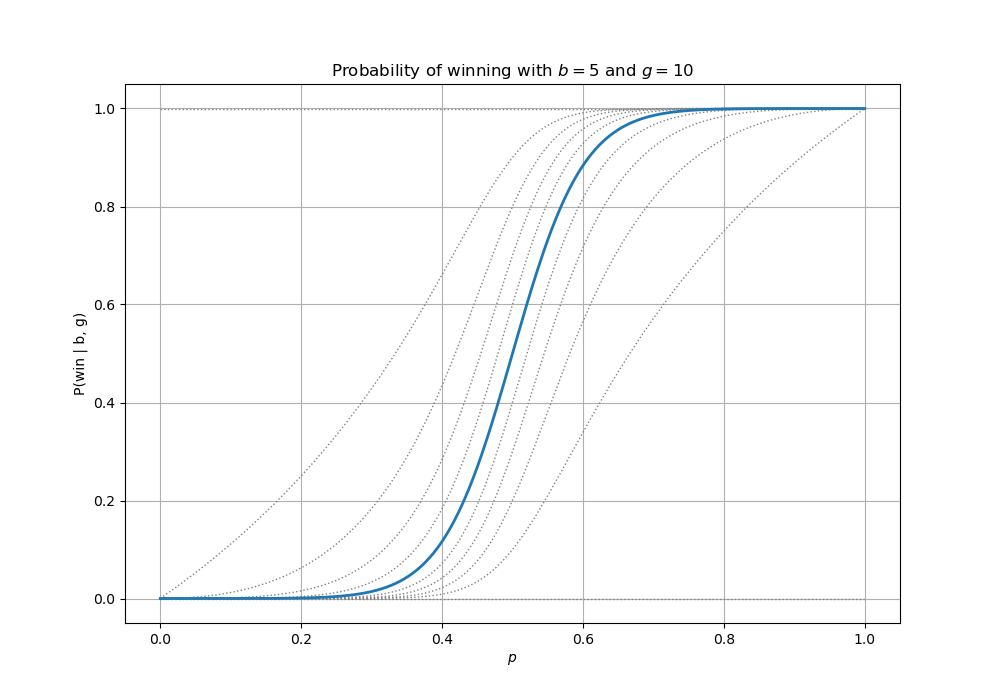

In [2]:
# Define initial parameters
b_def = 5
g_def = 10

# set up plot
plt.close()
fig, ax = plt.subplots(figsize=(10, 7))

b_sl = widgets.IntSlider(min=0, max=100, step=1, value=5, continuous_update=True)
g_sl = widgets.IntSlider(min=0, max=100, step=1, value=10, continuous_update=False)

@widgets.interact(b=b_sl, g=g_sl, ax=fixed(ax))
def update(b=5, g=10, ax=None):
    b_sl.max=g
    b_sl.value=min(b, g)
    g_sl.continuous_update = (g<30)
    #[l.remove() for l in ax.lines]
    ax.clear()
    ax.set_xlabel('$p$')
    ax.set_ylabel('P(win | b, g)')
    ax.set_title(f'Probability of winning with $b={b}$ and $g={g}$')
    ax.grid()
    for i in range(0, g+1):
        ax.plot(p_arr, [w(p, i, g) for p in p_arr], lw=1, ls=':', color='gray')
    ax.plot(p_arr, [w(p, b, g) for p in p_arr], lw=2, color='C0')
    

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0, step=0.01), IntSlider(value=10, continu…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
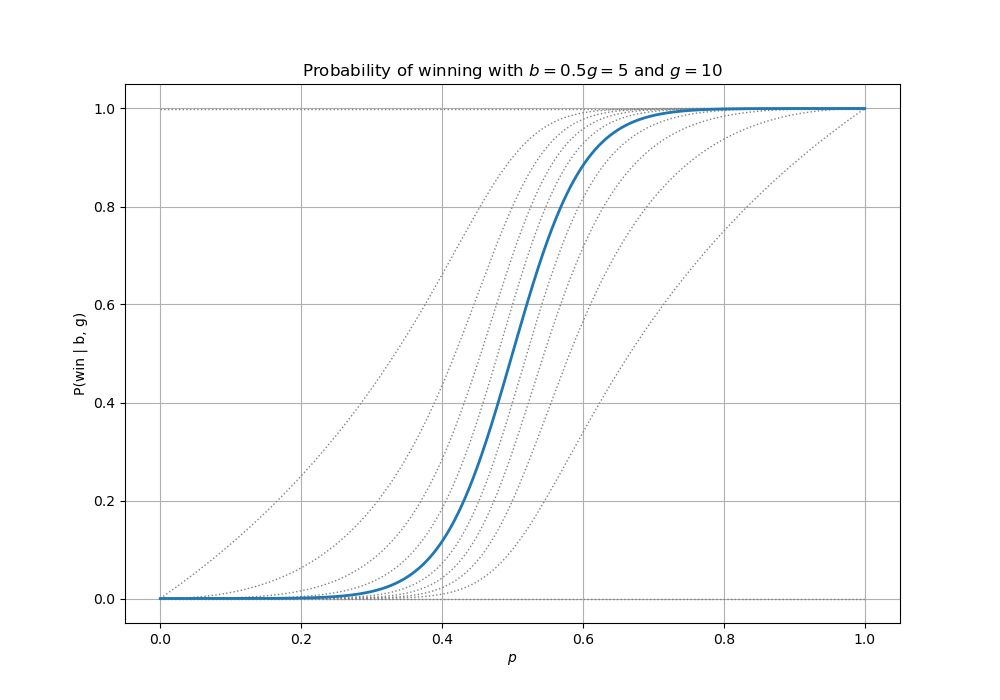

In [3]:
# Define initial parameters
r_def = 0.5
g_def = 10

# set up plot
plt.close()
fig, ax = plt.subplots(figsize=(10, 7))

r_sl = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=r_def, continuous_update=True)
g_sl = widgets.IntSlider(min=0, max=100, step=1, value=g_def, continuous_update=False)

@widgets.interact(r=r_sl, g=g_sl, ax=fixed(ax))
def update(r=r_def, g=g_def, ax=None):
    r_sl.step=1/g
    b=floor(r*g)
    g_sl.continuous_update = (g<30)
    #[l.remove() for l in ax.lines]
    ax.clear()
    ax.set_xlabel('$p$')
    ax.set_ylabel('P(win | b, g)')
    ax.set_title(f'Probability of winning with $b={r}g={b}$ and $g={g}$')
    ax.grid()
    for i in range(0, g+1):
        ax.plot(p_arr, [w(p, i, g) for p in p_arr], lw=1, ls=':', color='gray')
    ax.plot(p_arr, [w(p, b, g) for p in p_arr], lw=2, color='C0')
    

interactive(children=(FloatSlider(value=0.5, description='r', max=1.0, step=0.01), IntSlider(value=10, continu…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
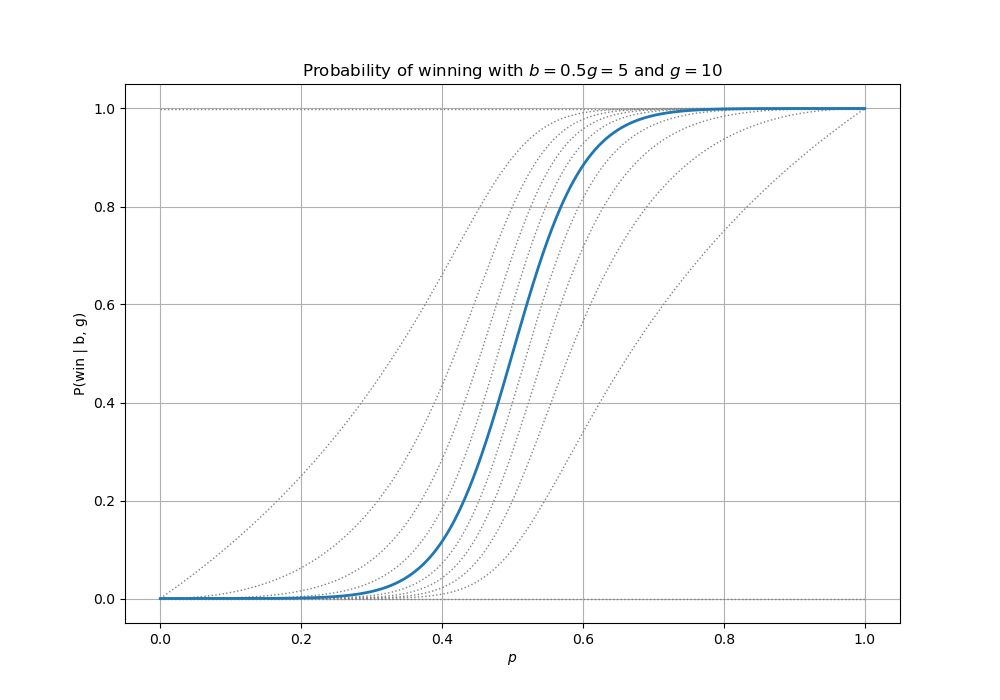

In [4]:
# Define initial parameters
r_def = 0.5
g_def = 10

# set up plot
plt.close()
fig, ax = plt.subplots(figsize=(10, 7))

r_sl = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=r_def, continuous_update=True)
g_sl = widgets.IntSlider(min=0, max=100, step=1, value=g_def, continuous_update=False)

@widgets.interact(r=r_sl, g=g_sl, ax=fixed(ax))
def update(r=r_def, g=g_def, ax=None):
    r_sl.step=1/g
    b=floor(r*g)
    g_sl.continuous_update = (g<30)
    #[l.remove() for l in ax.lines]
    ax.clear()
    ax.set_xlabel('$p$')
    ax.set_ylabel('P(win | b, g)')
    ax.set_title(f'Probability of winning with $b={r}g={b}$ and $g={g}$')
    ax.grid()
    for i in range(0, g+1):
        ax.plot(p_arr, [w(p, i, g) for p in p_arr], lw=1, ls=':', color='gray')
    ax.plot(p_arr, [w(p, b, g) for p in p_arr], lw=2, color='C0')

In [5]:
plt.close(fig)

from jupyterplot import ProgressPlot
import numpy as np
import random

t = 1000
n = 100
p = 0.6
X = np.random.binomial(1, p, (n, t)).tolist()

b_0 = 5
g = 20

def play(b, p, g): 
    if b <= 0:
        return 0
    elif b >= g:
        return g
    else:
        x = random.random() 
        if x > p or p == 0.0:
            return b-1
        else:
            return b+1

pp = ProgressPlot(plot_names=["budget"],
                  line_names=['p' + str(i) for i in range(n)]) #x_lim=[0, 1000], y_lim=[-1.5, 1.5])
b_arr = [b_0] * n
for i in range(t):
    b_arr = [play(b, p, g) for b in b_arr]
    pp.update([b_arr])
    if all(b == 0 or b == g for b in b_arr):
        break
pp.finalize()
